In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import seaborn as sns
import pickle
import numpy as np

In [59]:
model_file = "../../models/RandomForest_2"
data_file = "../../data/processed_data_1.csv"

In [60]:
data = pd.read_csv(data_file)
# Process type  ( Apartment: 0, Independent House: 1, Studio Apartment: 2, villa: 3 )
# Process status ( Ready to move: 0, under Construction: 1 )
for column in data:
    if column in ["bhk","status","house_type","new"]:
        # Get the value counts for the column
        value_counts = data[column].value_counts()
        # Find the values that occur fewer than 10 times
        to_drop = value_counts[value_counts < 10].index
        # Drop rows where the column's value is in the to_drop list
        data = data[~data[column].isin(to_drop)]
for column in data:
    if column in ["bhk","status","house_type","new"]:
        print("Column Name: ", column)
        print(data[column].unique())
        print(data[column].value_counts())

Column Name:  bhk
[2 1 3 4 5 6]
bhk
2    20154
1    16596
3     7278
4     1103
5      162
6       39
Name: count, dtype: int64
Column Name:  status
[1 0]
status
0    26904
1    18428
Name: count, dtype: int64
Column Name:  house_type
[0 2 1 3]
house_type
0    44580
2      597
3      110
1       45
Name: count, dtype: int64
Column Name:  new
[0 1]
new
1    27140
0    18192
Name: count, dtype: int64


In [76]:
def preprocessing(data:pd.DataFrame) -> pd.DataFrame:
    # data.drop(["status","new","house_type"], axis = 1, inplace = True)
    data = data.dropna()
    return data

In [62]:
processed_data = preprocessing(data)
for column in processed_data:
    print(column)

bhk
area
region
status
price_in_USD
house_type
new


In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
X = processed_data.drop(labels="price_in_USD",axis=1)
for column in X:
    if column in ["locality","region", "status", "age","type"]:
        X[column] = le.fit_transform(X[column])

Y = processed_data["price_in_USD"]

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

print(X.shape)
print(Y.shape)

(45332, 6)
(45332,)


In [64]:
from sklearn.model_selection import train_test_split
X_hold, X_test, Y_hold, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train, X_val, Y_train,Y_val = train_test_split(X_hold,Y_hold,test_size=0.2,random_state=0)

In [65]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(1, 40, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, random_state=42), X_hold, Y_hold,
                                          param_name="max_depth",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Max depth")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [66]:
from sklearn.model_selection import validation_curve

parameter_range = ["squared_error","absolute_error","friedman_mse", "poisson"]

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=20, random_state=42), X_hold, Y_hold,
                                          param_name="criterion",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Criterion")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [67]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(700 , 800, 2)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=20, random_state=42), X_hold, Y_hold,
                                          param_name="max_leaf_nodes",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Max leaf nodes")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [68]:
from sklearn.model_selection import learning_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_sizes, train_score, val_score = learning_curve(RandomForestRegressor(n_estimators=10,max_depth=20, random_state=42), X_hold, Y_hold,
                                          cv=4, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2")

train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)

val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)

plt.plot(train_sizes, train_score_mean,
         label="Training Score", color='b')
plt.plot(train_sizes, val_score_mean,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Learning Curve with Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [69]:
start = time.time()
# Create the model
model = RandomForestRegressor(n_estimators=10, max_depth=20 , random_state=42)
print("Start training...")
model.fit(X_train, Y_train)
end = time.time()
print("Time execution : ", end - start)
pickle.dump(model, open(model_file, 'wb'))

Start training...
Time execution :  0.4003593921661377


In [70]:
loaded_model = pickle.load(open(model_file, 'rb'))

In [ ]:
# Assuming you have obtained Y_pred and Y_test from your model

# Create a scatter plot or line plot
# Scatter plot for Y_test (green)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)

# Scatter plot for Y_pred (red)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend(fontsize=12)
plt.title('Actual vs. Predicted House Prices using Random Forest Regressor')
plt.grid(alpha=0.4)
# Show the plot
plt.show()

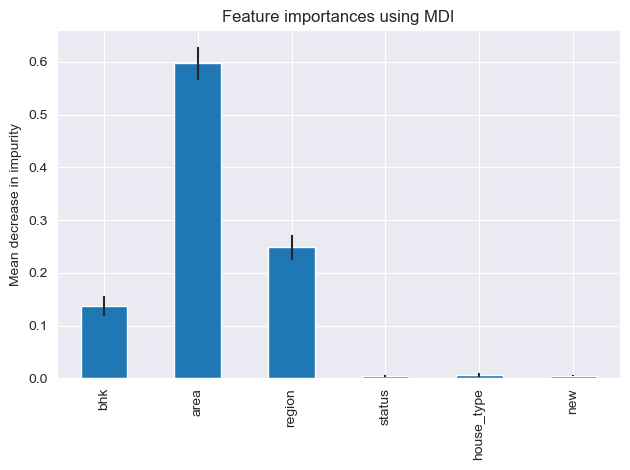

In [71]:
feature_names = [f"{column}" for column in X_train]
importances = loaded_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
sorted_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [72]:
#Make the predictions 
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":loaded_model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
14948,92400.0,91200.000000,1200.000000
19778,120000.0,137880.000000,-17880.000000
27087,45600.0,45193.200000,406.800000
14980,114000.0,117327.319994,-3327.319994
32008,226800.0,320040.000000,-93240.000000
...,...,...,...
19053,165600.0,161110.177487,4489.822513
28963,150000.0,122250.662622,27749.337378
41577,43200.0,58823.605632,-15623.605632
5062,132000.0,134463.843547,-2463.843547


In [73]:
from sklearn.metrics import r2_score
#Test the model
pred_train = loaded_model.predict(X_train)
pred_test = loaded_model.predict(X_test)
train_accuracy = r2_score(pred_train, Y_train)
test_accuracy = r2_score(pred_test, Y_test)
print('Training r2 score: ',train_accuracy)
print('Test r2 score: ',test_accuracy)

Training accuracy:  0.9749711923250769
Validation accuracy:  0.8999036601561927
Test accuracy:  0.9144781597120287


In [74]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)
print('Training mean squared error: ', mse_train)
print('Test mean squared error: ', mse_test)

Training mean squared error:  964905671.0769377
Validation mean squared error:  4271670107.7714233
Test mean squared error:  3142370613.0337744


In [75]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, pred_train)
mae_test = mean_absolute_error(Y_test, pred_test)
print('Training mean absolute error: ', mae_train)
print('Test mean absolute error: ', mae_test)

Training mean absolute error:  12316.657520213674
Validation mean absolute error:  21265.9326716188
Test mean absolute error:  20225.19373223057
